# Pandas avancé

## Groupby
***

La mécanique du groupby suit une logique dite de `split-apply-combine`

<img src="media/groupby.png" width="500"/>

#### Étape 1 : Split

Dans cette première étape, les données contenues dans un objet Pandas, qu'il s'agisse d'une Series, d'un DataFrame ou autre, sont divisées en groupes en fonction d'une ou plusieurs clés que vous fournissez. La division est effectuée sur un axe particulier de l'objet. Par exemple, un DataFrame peut être groupé sur ses lignes (axe=0) ou sur ses colonnes (axe=1).

In [4]:
import pandas as pd

# Création d'un DataFrame
data = {'Clé': ['A', 'B', 'A', 'B', 'A'],
        'Valeur': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Groupement par la colonne 'Clé'
groupes = df.groupby('Clé')
groupes.head()

,Clé,Valeur
0,A,1
1,B,2
2,A,3
3,B,4
4,A,5


#### Étape 2 : Apply

Une fois que les données sont divisées en groupes, une fonction est appliquée à chaque groupe, produisant une nouvelle valeur. Cette fonction peut être une agrégation statistique (comme la somme, la moyenne, etc.) ou une opération personnalisée.

In [9]:
# Calcul de la somme pour chaque groupe
somme_par_groupe = groupes.sum()

#### Étape 3 : Combine

Enfin, les résultats de toutes ces applications de fonction sont combinés dans un objet de résultat. La forme de l'objet résultant dépendra généralement de ce qui est fait avec les données.

In [10]:
print(somme_par_groupe)

     Valeur
Clé        
A         9
B         6


### _Exercice 1_

Vous avez le fichier suivant : 

In [13]:
df_ventes_aout = pd.read_excel("s3_data/August.xlsx")
df_ventes_aout.head()

,transaction_id,store,status,transaction_date,plan,contract_type,amount
0,8d2b0582,Chicago,ACTIVE,2019-08-01,Silver,NEW,14.25
1,61e3773d,Chicago,ACTIVE,2019-08-01,Gold,NEW,19.35
2,52b3f422,New York,ACTIVE,2019-08-01,Bronze,NEW,12.20
3,ae0498f2,Chicago,ACTIVE,2019-08-01,Silver,NEW,14.25
4,7d1f5d57,New York,ACTIVE,2019-08-01,Silver,NEW,14.25


* Calculez le montant total des transactions pour chaque magasin.

In [49]:
# Groupement par magasin et calcul de la somme des montants
split = df_ventes_aout.groupby('store')
print(split.head())

    transaction_id          store  status transaction_date    plan  \
0         8d2b0582        Chicago  ACTIVE       2019-08-01  Silver   
1         61e3773d        Chicago  ACTIVE       2019-08-01    Gold   
2         52b3f422       New York  ACTIVE       2019-08-01  Bronze   
3         ae0498f2        Chicago  ACTIVE       2019-08-01  Silver   
4         7d1f5d57       New York  ACTIVE       2019-08-01  Silver   
5         c03d6d26         Boston  ACTIVE       2019-08-01  Bronze   
6         8204d03f  San Francisco  ACTIVE       2019-08-01    Gold   
7         83cad5b1        Chicago  ACTIVE       2019-08-01  Silver   
8         adca93e5       New York  ACTIVE       2019-08-01  Bronze   
9         cea04b87  San Francisco  ACTIVE       2019-08-01  Silver   
10        2ad9e2e4  San Francisco  ACTIVE       2019-08-01  Silver   
11        5138d879  San Francisco  ACTIVE       2019-08-01  Silver   
12        58241dce  San Francisco  ACTIVE       2019-08-01  Silver   
13        2f05a6ed  

In [50]:
apply_combine = split['amount'].sum()
print(apply_combine)

store
Boston           12239.70
Chicago          24662.75
Las Vegas         6335.05
New York         36491.60
San Francisco    36895.10
Washington DC     6729.15
Name: amount, dtype: float64


* Calculez le nombre de transactions pour chaque type de plan.

In [54]:
resultat_size = df_ventes_aout.groupby('plan').size()
print(resultat_size)

plan
Bronze    2513
Gold      1665
Silver    4244
dtype: int64


* Calculer le montant moyen par date 

In [56]:
# Conversion de la colonne 'transaction_date' en format de date
df_ventes_aout['transaction_date'] = pd.to_datetime(df_ventes_aout['transaction_date'])

# Groupement par date de transaction et calcul de la moyenne des montants
resultat_date = df_ventes_aout.groupby('transaction_date')['amount'].mean()
print(resultat_date)

transaction_date
2019-08-01    14.611311
2019-08-02    14.978571
2019-08-05    14.604637
2019-08-06    14.683787
2019-08-07    14.506489
2019-08-08    14.758438
2019-08-09    14.656608
2019-08-12    14.548656
2019-08-13    14.246469
2019-08-14    14.661330
2019-08-15    14.849044
2019-08-16    14.660253
2019-08-19    14.642623
2019-08-20    14.776323
2019-08-21    14.485112
2019-08-22    14.797059
2019-08-23    14.769023
2019-08-26    14.593733
2019-08-27    14.636631
2019-08-28    14.703887
2019-08-29    14.562360
2019-08-30    14.449724
Name: amount, dtype: float64


* Calculez le montant total des transactions pour chaque combinaison de magasin et de plan.

In [58]:
# Groupement par magasin et plan, puis somme des montants
resultat_magasin_plan = df_ventes_aout.groupby(['store', 'plan'])['amount'].sum()
print(resultat_magasin_plan)


store          plan  
Boston         Bronze     3184.20
               Gold       2999.25
               Silver     6056.25
Chicago        Bronze     5648.60
               Gold       6559.65
               Silver    12454.50
Las Vegas      Bronze     1744.60
               Gold       1683.45
               Silver     2907.00
New York       Bronze     9235.40
               Gold       9229.95
               Silver    18026.25
San Francisco  Bronze     9198.80
               Gold       9926.55
               Silver    17769.75
Washington DC  Bronze     1647.00
               Gold       1818.90
               Silver     3263.25
Name: amount, dtype: float64


## Groupby avancé : la méthode `agg`
*** 

La méthode permet d'appliquer des fonctions d'agrégation à vos groupes, telles que la somme, la moyenne, le comptage, etc. Mais elle permet surtout d'appliquer plusieurs fonctions à la fois et créer de nouvelles colonnes avec les résultats agrégés.

Par exemple, avec une seule ligne de code, vous pouvez :

```python
import pandas as pd

# Charger les données
data = pd.read_csv("data.csv")

# Regrouper par une colonne et appliquer plusieurs fonctions d'agrégation
resultats = data.groupby('categorie').agg({
    'colonne1': 'sum',           # Somme de la colonne1
    'colonne2': ['mean', 'max']  # Moyenne et maximum de la colonne2
})

print(resultats)
```

### Exercice 2

Sur le fichier de ventes aout, écrivez un code en utilisant `groupby` et `agg` qui va permettre de connaitre la somme et la moyenne des transactions ainsi que la date de la première transaction pour chaque magasin.


In [53]:
final = df_ventes_aout.groupby('store').agg({"amount":[sum,"mean"],"transaction_date":lambda x: x.unique().tolist()[0]})
print(final.head())

                 amount            transaction_date
                    sum       mean         <lambda>
store                                              
Boston         12239.70  14.553746       2019-08-01
Chicago        24662.75  14.715245       2019-08-01
Las Vegas       6335.05  14.596889       2019-08-01
New York       36491.60  14.602481       2019-08-01
San Francisco  36895.10  14.675855       2019-08-01


## Travailler avec des séries temporelles
***

L'utilisation de Pandas pour l'analyse des séries temporelles est devenue une pratique courante dans le monde du business, en raison de la flexibilité, de l'efficacité et de la puissance de cette bibliothèque Python. Pandas offre une gamme étendue d'outils pour manipuler, nettoyer, analyser et visualiser des données temporelles.

Pandas est particulièrement bien adapté pour traiter et analyser des séries temporelles pour plusieurs raisons :

1. **Facilité de Manipulation des Dates :** Pandas offre une manipulation robuste des dates et des temps, convertissant facilement les chaînes en objets de date et heure, gérant les fuseaux horaires, et permettant des opérations de date arithmétiques complexes.
2. **Indexation Temporelle :** Avec Pandas, les séries temporelles peuvent être indexées par des dates, ce qui facilite le filtrage, la sélection et l'agrégation de données basées sur des plages de dates.
3. **Ressampling et Fenêtrage :** Pandas permet le resampling des séries temporelles pour changer la fréquence des données (par exemple, de quotidienne à mensuelle) et l'application de fonctions de fenêtrage pour calculer des statistiques mobiles comme la moyenne mobile.
4. **Visualisation Intégrée :** En s'intégrant étroitement avec Matplotlib, Pandas facilite la visualisation des données temporelles, permettant aux analystes de repérer rapidement les tendances, les saisons et les outliers.
5. **Large Éventail d'Outils d'Analyse :** Pandas est compatible avec d'autres bibliothèques d'analyse de données et de machine learning en Python, permettant des analyses sophistiquées et la modélisation prédictive à partir de séries temporelles.

Essayons de voir comment manipuler les séries temporelles dans python. 

Le premier élément est de définir les dates comme étant un objet ```datetime```. Par exemple, prenons le dataframe suivant où les dates sont sous formes de ```str```. 

In [2]:
df = pd.DataFrame({'Date': ['2011-01-01', '2011-01-02', '2011-01-03'], 'Vente':[4300, 2100, 3002]})
df

,Date,Vente
0,2011-01-01,4300
1,2011-01-02,2100
2,2011-01-03,3002


In [4]:
type(df['Date'][0])

str

Il faut alors convertir la donnée ```str``` en ```datetime```, ce qui nous permettra de la manipuler avec beaucoup plus de simplicité. Il nous suffit d'utiliser la fonction de pandas: ```pd.to_datetime()```

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Lorsque la donnée est convertie en objet ```datetime``` ou ```timestamp```, pandas permet alors de faire de nouvelle opérations. 

Pandas est une bibliothèque Python puissante pour l'analyse de données, et elle est particulièrement utile pour travailler avec des séries temporelles. Voici quelques exemples illustrant les fonctionnalités clés de Pandas dans le contexte des séries temporelles :
-1. Création de Séries Temporelles

Vous pouvez créer une série temporelle en utilisant un `DatetimeIndex` avec Pandas :

```python
import pandas as pd

# Création d'une série temporelle quotidienne
dates = pd.date_range('20240101', periods=6)
ts = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
pri-
```

### 2. Manipulation des Dates

Pandas facilite la manipulation des dates, comme le resampling ou la convers.

Il existe plusieurs alternatives pour la fonction ```resample()```:
'D' pour journalier , 'W' pour hebomadaire, 'M' pour mensuel.n de fréquences :

```python
# Conversion en fréquence mensuelle
monthly_ts = ts.resample('M').mean()
p-onthly_ts)
```

### 3. Sélection et Filtrage

Sélectionner et filtrer des données basées sur des plages de dates est simple avec Pandas :

```python
# Sélectionner une plage de dates
selected = ts['2024-01-02':'2024-01-04']
print(selected)

# Filtrer pour obtenir les valeurs après une certaine date
filtered = ts[ts.index > -01-03']
print(filtered)
```

### 4. Fonctions de Fenêtrage

Calculer des statistiques mobiles, comme la moyenne mobile, est une opération courante sur les séries temporelles :

```python
# Calculer la moyenne mobile sur 3 jours
moving_avg = ts.rol-indow=3).mean()
print(moving_avg)
```

### 5. Travail avec des Données Manquantes

Les données manquantes peuvent être gérées efficacement. Par exemple, vous pouvez remplir les valeurs manquantes par interpolation :

```python
# Remplir les valeurs manquantes par interpolati-lled_ts = ts.interpolate()
print(filled_ts)
```

### 6. Décalage et Différenciation

Le décalage des données temporelles permet de calculer les changements ou les rendements d'une période à l'autre :

```python
# Calculer le changem-otidien
daily_change = ts.diff()
print(daily_change)
```

### 7. Conversion de Fuseaux Horaires

Pandas permet également de gérer les fuseaux horaires dans les séries temporelles :

```python
# Attribuer un fuseau horaire
ts_tz = ts.tz_localize('UTC')

# Convertir en un autre fuseau horaire
ts_mporelles sophistiquées et tirer des insights précieux de vos données temporelles.

### Exercice 3

Considerez le jeu de donnée suivant:

In [12]:
sales = pd.read_csv('Sales.csv')
sales.head()

,Sales_Product_A,Sales_Product_B,Sales_Product_C
Date,,,
2023-01-01 00:00:00,18.727006,5.436992,13.452042
2023-01-01 01:00:00,47.743988,2.119852,8.958314
2023-01-01 02:00:00,37.015882,22.483330,17.529319
2023-01-01 03:00:00,30.556298,17.608218,3.792345
2023-01-01 04:00:00,8.630413,25.752552,14.184311


- Selectionnez les ventes des produits A et B réalisées entre le 10 et 20 du mois

In [22]:
# SOLUTION 
ventes_AB = sales.loc['2023-01-10':'2023-01-20'][['Sales_Product_A', 'Sales_Product_B']]
ventes_AB

,Sales_Product_A,Sales_Product_B
Date,,
2023-01-10 00:00:00,18.330577,28.665320
2023-01-10 01:00:00,39.193610,4.653957
2023-01-10 02:00:00,34.155888,18.300040
2023-01-10 03:00:00,43.937711,9.107581
2023-01-10 04:00:00,34.156919,17.391105
...,...,...
2023-01-20 19:00:00,53.692246,31.631073
2023-01-20 20:00:00,7.852806,31.564122
2023-01-20 21:00:00,31.967437,25.054389


- Créer un dataframe avec les ventes totales journalières pour les trois produits

In [14]:
# SOLUTION
ventes_journalières = sales.resample('D').sum()
ventes_journalières.head()

,Sales_Product_A,Sales_Product_B,Sales_Product_C
Date,,,
2023-01-01,581.247015,373.241230,299.898478
2023-01-02,664.624299,464.361257,316.469631
2023-01-03,677.276093,406.250277,261.201324
2023-01-04,573.877620,429.974648,191.800049
2023-01-05,453.980881,235.321518,212.705480


- Suivez l'évolution de la moyenne hebdomadaire des ventes du produit B

In [15]:
# SOLUTION 
ventes_moyenne_B = sales.resample('W').mean()['Sales_Product_B']
ventes_moyenne_B.head()

Date
2023-01-01    15.551718
2023-01-08    14.774269
2023-01-15    15.516203
2023-01-22    16.233495
2023-01-29    14.263473
Freq: W-SUN, Name: Sales_Product_B, dtype: float64

- Trouvez les ventes moyennes faites entre 22:00 et 6:00 pour les trois produits

In [17]:
# SOLUTION
ventes_nocturnes = sales.between_time('22:00', '6:00').mean()
ventes_nocturnes

Sales_Product_A    25.006376
Sales_Product_B    15.005552
Sales_Product_C    10.539687
dtype: float64

- Créez une moyenne glissante des ventes du produit A. Prenez une fenêtre de 5 heures. 

In [23]:
# SOLUTION 
ventes_A_moyenne = sales['Sales_Product_A'].rolling(5).mean()
ventes_A_moyenne

Date
2023-01-01 00:00:00          NaN
2023-01-01 01:00:00          NaN
2023-01-01 02:00:00          NaN
2023-01-01 03:00:00          NaN
2023-01-01 04:00:00    28.534717
                         ...    
2023-01-30 20:00:00    24.955584
2023-01-30 21:00:00    29.874654
2023-01-30 22:00:00    26.992433
2023-01-30 23:00:00    30.814304
2023-01-31 00:00:00    30.912957
Name: Sales_Product_A, Length: 721, dtype: float64

## Matplotlib avec pandas

L'utilisation de Matplotlib en tandem avec Pandas simplifie grandement la visualisation de données, en particulier pour les séries temporelles et d'autres types de données structurées. Pandas offre une intégration transparente avec Matplotlib, permettant aux utilisateurs de créer des graphiques explicites et informatifs avec peu de code. Cette combinaison est particulièrement puissante pour l'exploration de données, la présentation de résultats d'analyses, et la mise en évidence d'insights clés.

Pandas facilite la visualisation en permettant de tracer directement des graphiques à partir de DataFrames et de Series. Chaque colonne peut être représentée comme une série dans le graphique, ce qui rend les comparaisons entre différentes catégories de données simples et directes.

L'utilisation la plus simple de matplotlib avec pandas est juste d'utiliser la fonction ```plot()``` sur un dataframe. Fonction qui crée un lineplot de toutes les colonnes du dataframe

<Axes: xlabel='Date'>

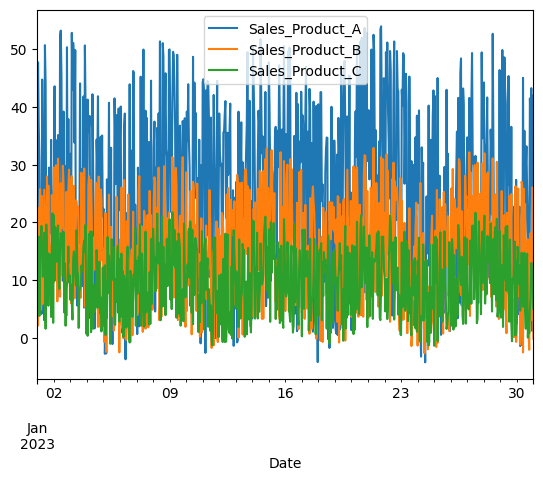

In [26]:
import matplotlib.pyplot as plt 
sales.plot()

Le graphique n'étant pas forcément très beau, on peut passer plusieurs options pour améliorer le rendu

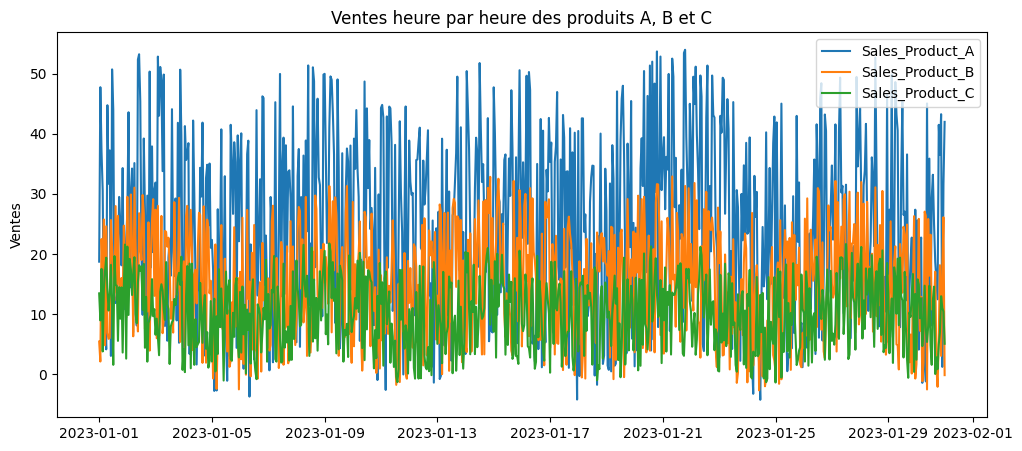

In [34]:
plt.figure(figsize=(12,5))
plt.title('Ventes heure par heure des produits A, B et C')
plt.plot(sales)
plt.legend(sales.columns, loc='best')
plt.ylabel('Ventes')
plt.show()

### Exercice 4

- Créez un boxplots pour les produits A, B et C

<Axes: >

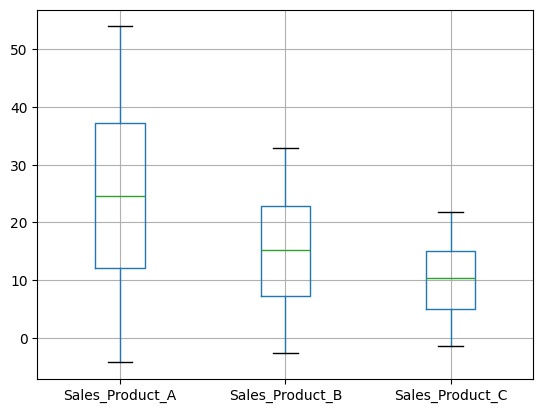

In [35]:
sales.boxplot()

- Regardez l'évolution moyenne des ventes du produit A heure par heure (regardez en moyenne sur une journée combien de ventes fait le produit A heure par heure)

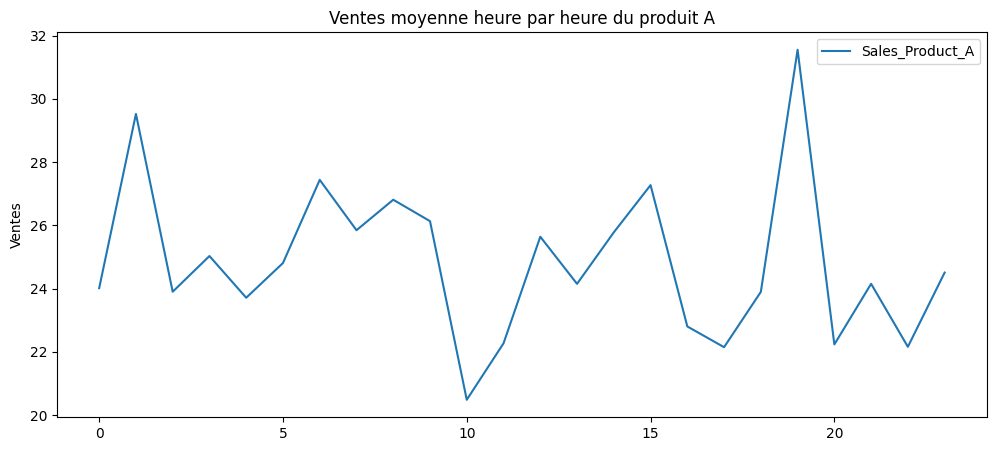

In [46]:
# SOLUTION 
sales['heure'] = sales.index.hour
heure_A = sales.groupby('heure').mean()['Sales_Product_A']

plt.figure(figsize=(12,5))
plt.title('Ventes moyenne heure par heure du produit A')
plt.plot(heure_A)
plt.legend(sales.columns, loc='best')
plt.ylabel('Ventes')
plt.show()